In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [105]:
#red points in Bishop
#mu1 = [1.5, -2]  
mu1 = [1.5, -2]
cov1 = [[2, -1], [-1, 2]]  

sample1 = np.random.multivariate_normal(mu1, cov1, 800)

In [106]:
#blue points in Bishop
mu2 = [-1.5, -1.5]  

cov2 = [[2, 1], [1, 2]]  

sample2 = np.random.multivariate_normal(mu2, cov2, 800)


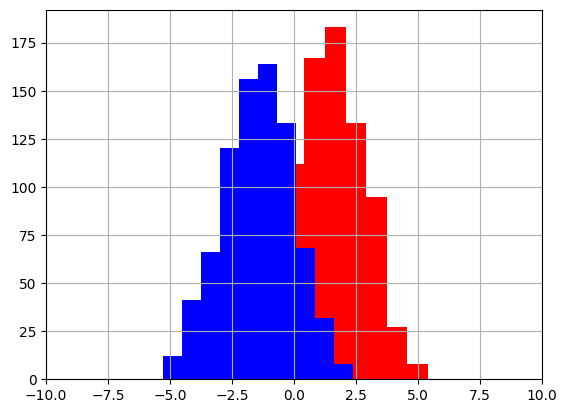

In [107]:
plt.hist(sample1[:, 0], color='red')
plt.hist(sample2[:,0], color='blue')
plt.xlim(-10, 10)
plt.grid()
plt.show()

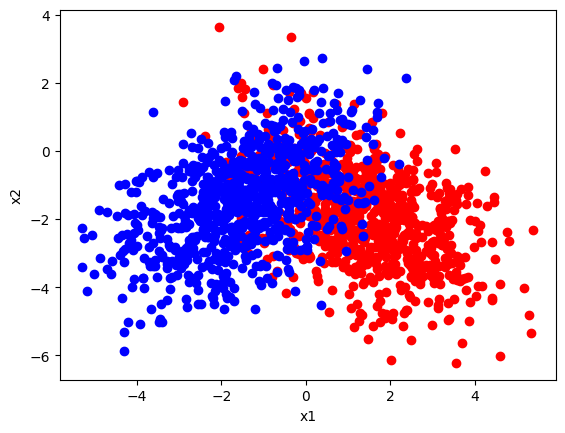

In [108]:
#correlation between samples from two classes (red and blue) in the 2D input space

plt.scatter(sample1[:,0], sample1[:,1], color='red')
plt.scatter(sample2[:,0], sample2[:,1], color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [109]:
#training and test set (75% training set and 25% test set for predictive analysis 
x1_train, x1_test, x2_train, x2_test = train_test_split(sample1, sample2, test_size=0.25, random_state=42)
# Adding a column as the "Target" i.e. the predicted value for y
x1_x2_train = np.append(x1_train, x2_train, axis=0)
x1_x2_test = np.append(x1_test, x2_test, axis=0)
targets = np.append([1 for points in x1_train], [-1 for points in x2_train], axis=0)
len(x1_x2_test)
#len(x1_train), len(x2_train)
#len(x1_test), len(x2_test)

400

In [110]:
regr = LinearRegression() 
regr.fit(x1_x2_train, targets) 
class_pred = regr.predict(x1_x2_test)
#print(class_pred)

In [111]:
coefficient = regr.coef_
intercept = regr.intercept_
print(coefficient[0], intercept)

0.3493166236513268 -0.1045965032219768


In [112]:
x1_1D = np.linspace(-7, 7, 1000)
x2_1D = np.linspace(-8, 8, 1000)
#len(x1_1D)
#len(x2_1D)
x1_x2_2D = np.append(x1_1D, x2_1D, axis=0)

### $y(x1, x2) = m1 \times x1 + m2 \times x2 + b$ - hyperplane
### in the $x1-x2$ plane $y = 0$ and it will be a line 
### equation of line $\Rightarrow \frac{x1}{(-b/m1)} + \frac{x2}{(-b/m2)} = 1$
### for plotting in x1-x2 space x-axis will be $x1$ values and corresponding values for $x2 = -\frac{b}{m2} - \frac{m1 \times x1}{m2}$
### will be y-axis

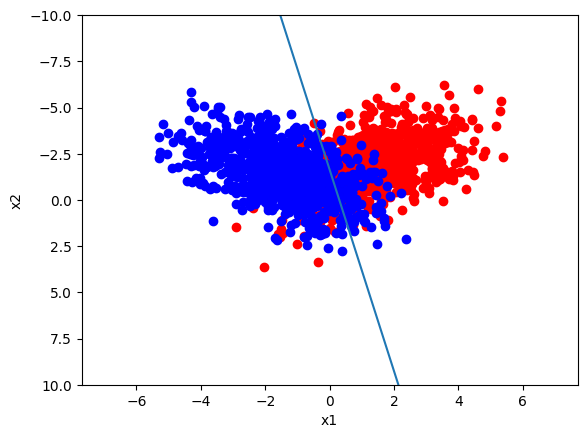

In [113]:
plt.plot(x1_1D, -intercept/coefficient[1] - coefficient[0] * x1_1D/coefficient[1]) 
plt.scatter(sample1[:,0], sample1[:,1], color='red')
plt.scatter(sample2[:,0], sample2[:,1], color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.ylim(10, -10)
plt.show()